# Analyzing COVID-19 Data

## Data Source

The Data is Downloaded from the [European Centre for Disease Prevention and Control](https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide)

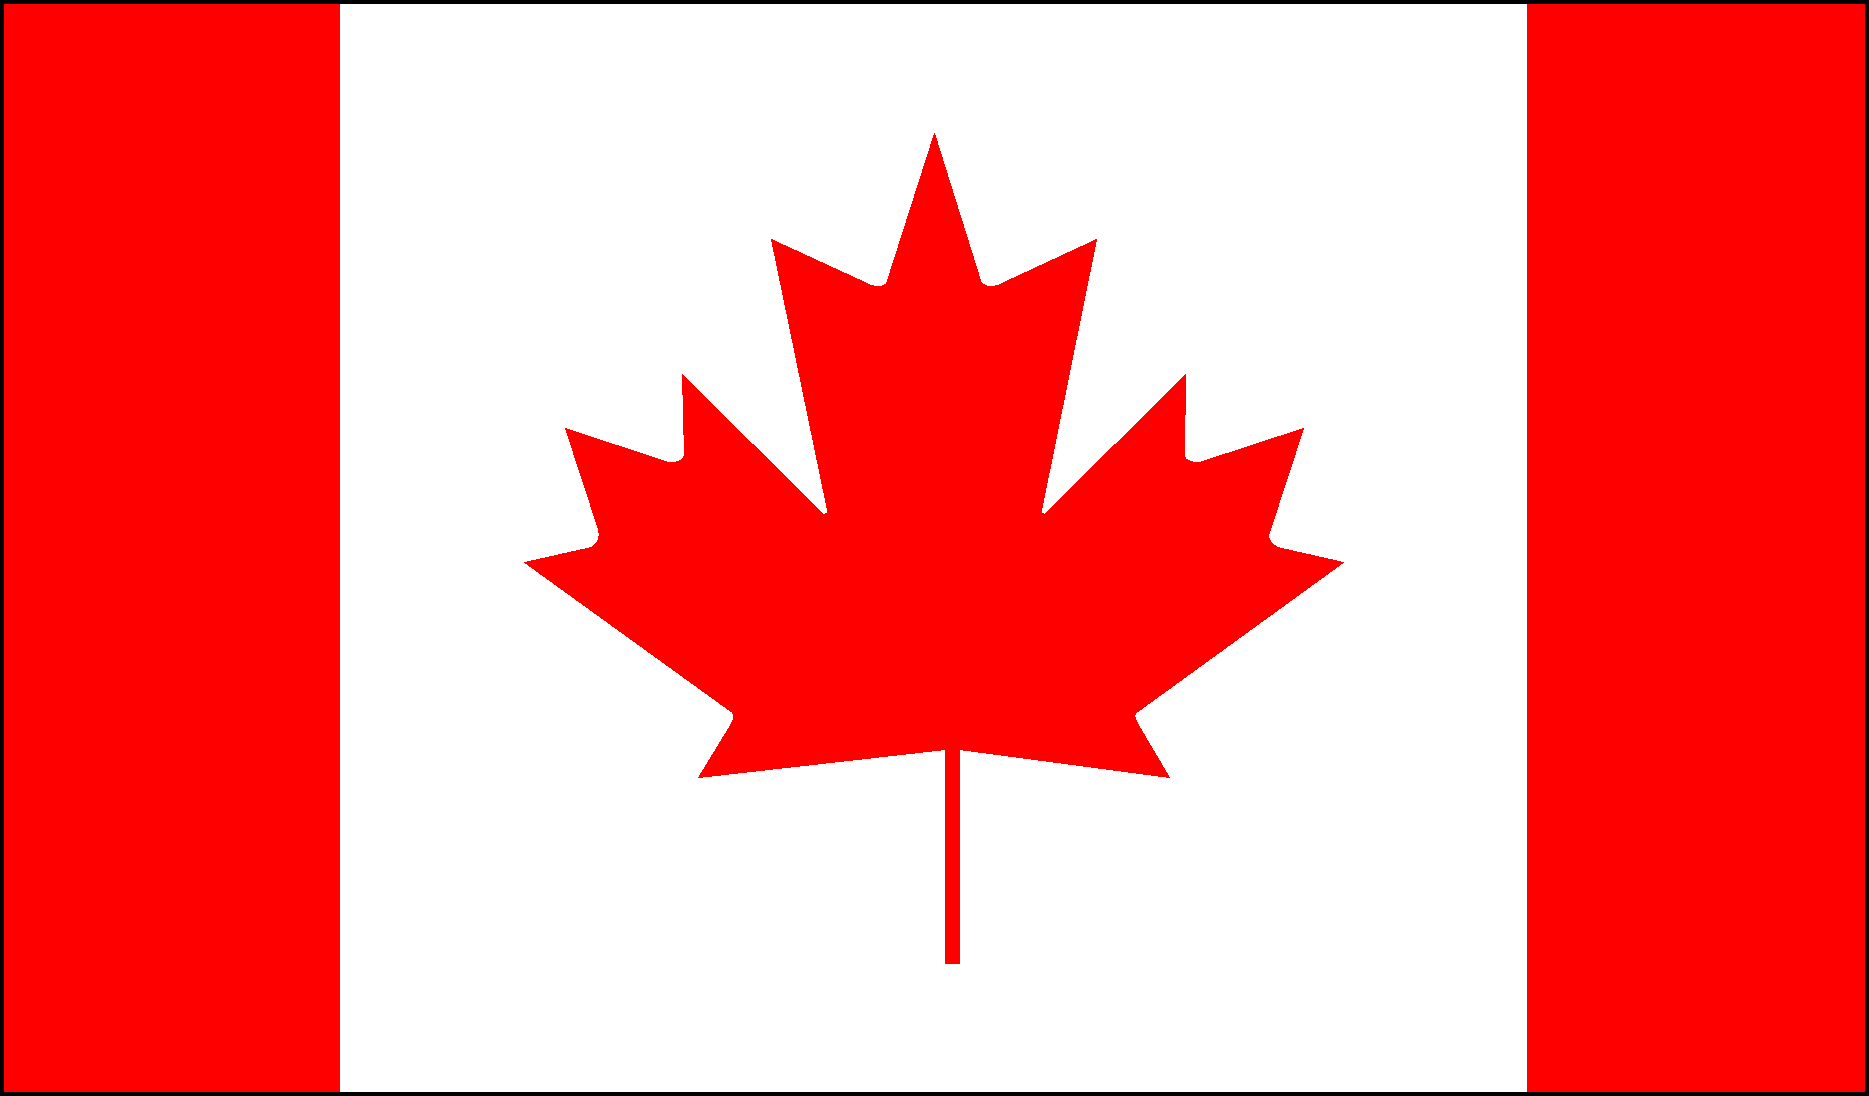

## Covid-19 Background Information

Covid-19 was first identified in Wuhan, China, in late 2019. After attempts to contain it failed, the virus quickly spread. On January 30th, 2020, the World Health Organization deemed it an international concern. On March 11th, 2020, it was declared a global pandemic. Since then, it has caused widespread social and economic disruption. The data featured here offer a few ways of gauging the virus's impact throughout 2020.

In [40]:
%matplotlib inline
import pandas
import pandas as pd

## Data Synopsis

In [41]:
df = pandas.read_excel('s3://scott-ia241/COVID FILE.xls')
df[:10]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-12-14,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,2020-12-13,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-12-11,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-12-10,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658
5,2020-12-09,9,12,2020,135,13,Afghanistan,AF,AFG,38041757.0,Asia,6.963401
6,2020-12-08,8,12,2020,200,6,Afghanistan,AF,AFG,38041757.0,Asia,7.094835
7,2020-12-07,7,12,2020,210,26,Afghanistan,AF,AFG,38041757.0,Asia,7.215755
8,2020-12-06,6,12,2020,234,10,Afghanistan,AF,AFG,38041757.0,Asia,7.326160
9,2020-12-05,5,12,2020,235,18,Afghanistan,AF,AFG,38041757.0,Asia,7.115865


## Canada's Covid-19 Data

In [42]:
canada_data = df.loc[(df['countriesAndTerritories']) == 'Canada']
canada_data[:10]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
10316,2020-12-14,14,12,2020,5891,81,Canada,CA,CAN,37411038.0,America,241.813659
10317,2020-12-13,13,12,2020,6011,99,Canada,CA,CAN,37411038.0,America,240.682977
10318,2020-12-12,12,12,2020,6772,142,Canada,CA,CAN,37411038.0,America,239.974630
10319,2020-12-11,11,12,2020,6739,126,Canada,CA,CAN,37411038.0,America,237.822859
10320,2020-12-10,10,12,2020,6295,116,Canada,CA,CAN,37411038.0,America,234.861166
10321,2020-12-09,9,12,2020,5981,90,Canada,CA,CAN,37411038.0,America,231.458427
10322,2020-12-08,8,12,2020,7872,112,Canada,CA,CAN,37411038.0,America,228.539502
10323,2020-12-07,7,12,2020,6261,76,Canada,CA,CAN,37411038.0,America,226.347636
10324,2020-12-06,6,12,2020,6352,93,Canada,CA,CAN,37411038.0,America,222.420987
10325,2020-12-05,5,12,2020,6299,89,Canada,CA,CAN,37411038.0,America,218.785696


## 1. How did Covid-19 Fatalities Trend in Canada? (2020)

<AxesSubplot:title={'center':'Covid-19 Fatality Trends (Canada)'}, xlabel='dateRep'>

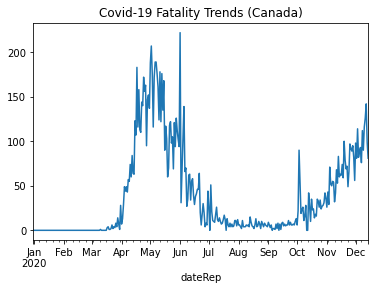

In [43]:
canada_deaths_over_time = canada_data.groupby('dateRep').sum()['deaths']
canada_deaths_over_time.plot(title='Covid-19 Fatality Trends (Canada)')

#### Calculations Explained

The .loc[] method enabled the selection of one label (Canada), the .groupby() method grouped the data by one selected collumn (dateRep) and the .sum() method aggregated the selected variable (deaths) for each dateRep interval.

#### Interpretation

This graph shows how covid-19 deaths trended in Canada throughout 2020. The x-axis respresents the timeframe, and the y-axis represents the number of deaths. Canada's first covid-19 deaths occured in March of 2020. In April, the death toll spiked dramatically, but began to trend downwards in May. The highest daily count occured in June, but ultimately continued to decline. In October, it spiked again, and continued to rise rapidly throughout December.

## 2a. What is Each Continent's Population? (2020)

In [44]:
df1 = pandas.read_excel('s3://scott-ia241/COVID FILE.xls')
Asia = df1.loc[(df['continentExp']) == 'Asia']
uninflate = Asia.drop_duplicates(['popData2019'])
pop=uninflate.sum()['popData2019']
print(pop)

4460056021.0


In [45]:
Africa = df1.loc[(df['continentExp']) == 'Africa']
uninflate = Africa.drop_duplicates(['popData2019'])
pop=uninflate.sum()['popData2019']
print(pop)

1306903030.0


In [46]:
America = df1.loc[(df['continentExp']) == 'America']
uninflate = America.drop_duplicates(['popData2019'])
pop=uninflate.sum()['popData2019']
print(pop)

1013601796.0


In [47]:
Europe = df1.loc[(df['continentExp']) == 'Europe']
uninflate = Europe.drop_duplicates(['popData2019'])
pop=uninflate.sum()['popData2019']
print(pop)

848216220.0


In [48]:
Oceania = df1.loc[(df['continentExp']) == 'Oceania']
uninflate = Oceania.drop_duplicates(['popData2019'])
pop=uninflate.sum()['popData2019']
print(pop)

41467380.0


In [49]:
Oceania = df1.loc[(df['continentExp']) == 'Oceania']
uninflate = Oceania.drop_duplicates(['popData2019'])
pop=uninflate.sum()['popData2019']
print(pop)

41467380.0


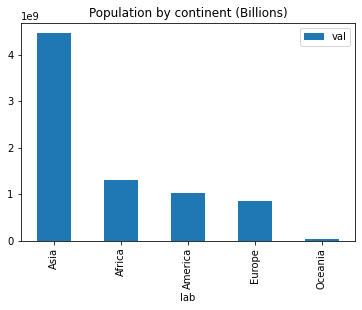

In [50]:
df2 = pd.DataFrame({'lab':['Asia', 'Africa', 'America','Europe','Oceania'], 'val':[4.460056e+09,1.306903e+09,1.013602e+09,848216220.0,41467380.0]})
ax = df2.plot.bar(x='lab', y='val', title= 'Population by continent (Billions)')

## 2b. What is Each Continent's Covid-19 Fatality Count? (2020)

<AxesSubplot:title={'center':'Fatalities by Continent'}, xlabel='continentExp'>

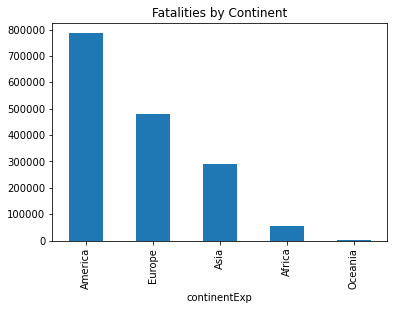

In [51]:
covid_deaths_over_time=df.groupby('continentExp').sum()['deaths']
covid_deaths_over_time.nlargest(5).plot.bar(title='Fatalities by Continent')

#### Calculations Explained

**2a.** The .loc[] method narrowed the focus to a single continent. The .drop_duplicates() method eliminated all duplicate population numbers, enabling use of the .sum() method to aggregate the continents total population without an inflated output. This was repeated for each continent. Then, the populations were graphed by assigning a value (population) to a label (continent), and assigning value and label to an axis (y and x respectively).


**2b.** The .groupby method enabled selection of the 'continentExp' variables, and the .sum() method aggregated the deaths per continent.

#### Interpretation

**2a.** Asia is more than four times as populous as Africa, which is slightly more populous than America and Europe (respectively). Oceania is by far the least populous.

**2b.** In 2020, America lead in the total number of deaths (≈785,000), followed by Europe (≈480,000), Asia (≈290,000), Africa (≈56,000), and Oceania (≈1,200) respectively. In other words, there was significant variance between the continents in terms of covid-19 deaths.

**Comprehensive:** When considered together, the graphs reveal that the population to deaths ratio varied significantly between the different continents. For example, even though America is more than four times less populous than Asia, it had more than twice as many deaths. Europe had the second most deaths, even though it is only the fourth most populous continent. Only Oceania occupied the same spot on both graphs.

## 3. American Countries Ranked by Fatalities

In [52]:
America_data = df.loc[(df['continentExp']) == 'America']
deaths_per_America_country=America_data.groupby('countriesAndTerritories').sum()['deaths']
deaths_per_America_country.nlargest(9)

countriesAndTerritories
United_States_of_America    299177
Brazil                      181402
Mexico                      113953
Argentina                    40766
Colombia                     39053
Peru                         36677
Chile                        15886
Ecuador                      13875
Canada                       13431
Name: deaths, dtype: int64

#### Calculations Explained

The .loc[] method was used to narrow the list to one continent (America). The .groupby() method enabled selection of the countriesAndTerritories variable, and the .sum() method aggregated the deaths per American country. Finally, the .nlargest() method listed the top countries by death, up to the selected number (9).

#### Interpretation

This list shows which countries from the Americas suffered the most covid-19 deaths in 2020. Compared to many other American countries, Canada suffered significantly fewer deaths. So, while the Americas had far more deaths than any other continent, Canada was not one of the main contributors.

## Limitations

Analysis was limited to data from 2020, meaning the trends were incomplete. For example, the data continues to trend upwards through December, but the graph cuts off, leaving some ambiguity. Some countries may also have underreported cases/deaths. This would be an external limitation, but would lead to a less accurate picture of the pandemic's impact.

## Improvements

One improvement would be to combine the charts from #2 to display each continents death rate. This would result in greater efficiency and succinctness.

## Conclusion

This analysis offers a brief view of covid-19's impact on Canada, as well as each continent. Based on the statistics presented, it seems that Canada handled the pandemic much better than similar/nearby countries. It also appears that the relationship between population and death is quite complex. One would expect a simple positive-correlation, but the data does not support this conclusion. It should also be noted that there are many other ways of gauging the impact of covid-19, such as economic and social effects. Ultimately, this analysis exhibits different ways of employing, evaluating and visualizing data using python.

## Author Information

- Soren Scott
- IA 241 Spring 2022
- scott3db@dukes.jmu.edu
- James Madison University